This notebook focuses on league-average NHL players data to compare with the All-Star selections. First, we will have to define what a league-average player is in the league. This will be done by splitting players into forwards and defenseman, as well as creating a distribution for play production for the seasons 2010-2020. Then, we can take a random sample for both offense and defense, and create visualizations based on what we defined as league-average players. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportypy

player_data = pd.read_pickle("pickled_data/player_info")
plays_data = pd.read_pickle("pickled_data/game_plays")
plays_players_data = pd.read_pickle("pickled_data/game_plays_players")
player_info = pd.read_pickle("pickled_data/player_info")

player_info['birthDate'] = pd.to_datetime(player_info['birthDate'], errors='coerce')

merged_df = plays_data.merge(plays_players_data, on='play_id', how='left')
merged_df = merged_df.merge(player_info, left_on='player_id', right_on='player_id', how='left')
current_year = 2020
merged_df = merged_df[(current_year - merged_df['birthDate'].dt.year >= 20) & (current_year - merged_df['birthDate'].dt.year <= 30)]

Above we have defined the age of players in our dataset to be between 20 and 30, as the average career in the NHL is around 6 years. Now, we have to split players into their offensive and defensive positions, as well as define what scoring and defense plays are for each group.

In [2]:
scoring_plays = ['Goal', 'Assist']
defensive_plays = ['Goal', 'Assist']

offensive_positions = ['C', 'LW', 'RW']
defensive_positions = ['D']

offensive_df = merged_df[merged_df['event'].isin(scoring_plays)]
defensive_df = merged_df[merged_df['event'].isin(defensive_plays)]

offensive_df = merged_df[merged_df['primaryPosition'].isin(offensive_positions)]
defensive_df = merged_df[merged_df['primaryPosition'].isin(defensive_positions)]

offensive_stats = offensive_df.groupby('player_id').size().reset_index(name='offensive_events')
defensive_stats = defensive_df.groupby('player_id').size().reset_index(name='defensive_events')

offensive_stats = offensive_stats.merge(player_info, on='player_id', how='left')
defensive_stats = defensive_stats.merge(player_info, on='player_id', how='left')

low_offensive, high_offensive = offensive_stats['offensive_events'].quantile([0.15, 0.65])
low_defensive, high_defensive = defensive_stats['defensive_events'].quantile([0.15, 0.65])

offensive_stats = offensive_stats[(offensive_stats['offensive_events'] >= low_offensive) & (offensive_stats['offensive_events'] <= high_offensive)]
defensive_stats = defensive_stats[(defensive_stats['defensive_events'] >= low_defensive) & (defensive_stats['defensive_events'] <= high_defensive)]



Above we have filtered the positions and game events to be within the scoring and defensive plays. We also grouped all the data by player_id, and filted out outliers with a pretty strong range as there is a wide range in production for NHL players. All-Stars would heavily skew the average point production to the right, as well as under-performing players that have barely played alot of NHL games would skew the data to 0 points. We had to account for that by cutting the bottom 15% and upper 35%, therefore defining a league-average player. Now, we can model the distribution in histograms for both offense and defense. 

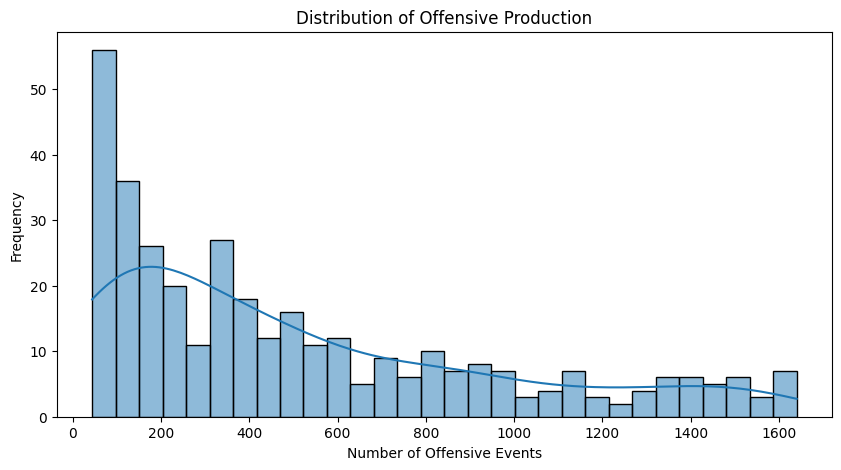

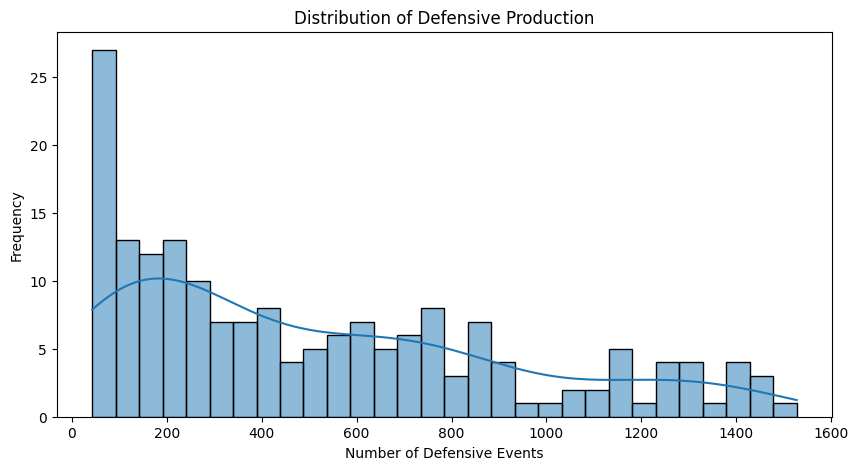

'Random Defensive Player Sample:'

,player_id,defensive_events,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches,fullName,allStarSeasons
98,8476289.0,739,Alexey,Marchenko,RUS,Moscow,D,1992-01-02 00:00:00,NaN,"6' 3""",190.50,210.0,R,Alexey Marchenko,NaN
286,8479324.0,553,Ryan,Lindgren,USA,Burnsville,D,1998-02-11 00:00:00,MN,"6' 0""",182.88,191.0,L,Ryan Lindgren,NaN
262,8478491.0,755,Jacob,Larsson,SWE,Ljungby,D,1997-04-29 01:00:00,NaN,"6' 2""",187.96,195.0,L,Jacob Larsson,NaN
330,8480160.0,689,Radim,Simek,CZE,Mlada Boleslav,D,1992-09-20 01:00:00,NaN,"5' 11""",180.34,200.0,L,Radim Simek,NaN
164,8476983.0,522,Paul,LaDue,USA,Grand Forks,D,1992-09-06 01:00:00,ND,"6' 2""",187.96,198.0,R,Paul LaDue,NaN
352,8480945.0,630,Juuso,Riikola,FIN,Joensuu,D,1993-11-09 00:00:00,NaN,"6' 0""",182.88,189.0,L,Juuso Riikola,NaN
224,8477945.0,574,Julius,Honka,FIN,Jyväskylä,D,1995-12-03 00:00:00,NaN,"5' 11""",180.34,186.0,R,Julius Honka,NaN
199,8477463.0,907,Steven,Santini,USA,Bronxville,D,1995-03-07 00:00:00,NY,"6' 2""",187.96,205.0,R,Steven Santini,NaN
267,8478567.0,536,Dean,Kukan,CHE,Volketswil,D,1993-07-08 01:00:00,NaN,"6' 2""",187.96,186.0,L,Dean Kukan,NaN
173,8477043.0,687,Christian,Djoos,SWE,Gothenburg,D,1994-08-06 01:00:00,NaN,"6' 0""",182.88,169.0,L,Christian Djoos,NaN


'Random Offensive Player Sample:'

,player_id,offensive_events,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches,fullName,allStarSeasons
33,8475150.0,866,Jordan,Caron,CAN,Sayabec,RW,1990-11-02 00:00:00,QC,"6' 3""",190.50,204.0,L,Jordan Caron,NaN
574,8479346.0,558,Dillon,Dube,CAN,Golden,C,1998-07-20 01:00:00,BC,"5' 11""",180.34,187.0,L,Dillon Dube,NaN
160,8475878.0,707,Freddie,Hamilton,CAN,Toronto,C,1992-01-01 00:00:00,ON,"6' 1""",185.42,195.0,R,Freddie Hamilton,NaN
4,8474582.0,550,Mattias,Tedenby,SWE,Vetlanda,RW,1990-02-21 00:00:00,NaN,"5' 9""",175.26,175.0,L,Mattias Tedenby,NaN
267,8476857.0,867,Pontus,Aberg,SWE,Stockholm,LW,1993-09-23 01:00:00,NaN,"5' 11""",180.34,196.0,R,Pontus Aberg,NaN
477,8478233.0,957,Andrew,Mangiapane,CAN,Toronto,LW,1996-04-04 01:00:00,ON,"5' 10""",177.80,184.0,L,Andrew Mangiapane,NaN
90,8475310.0,712,Curtis,McKenzie,CAN,Golden,LW,1991-02-22 00:00:00,BC,"6' 2""",187.96,205.0,L,Curtis McKenzie,NaN
328,8477330.0,591,Dominik,Kubalik,CZE,Plzen,LW,1995-08-21 01:00:00,NaN,"6' 2""",187.96,179.0,L,Dominik Kubalik,NaN
100,8475671.0,601,Matt,Fraser,CAN,Red Deer,RW,1990-05-20 01:00:00,AB,"6' 3""",190.50,206.0,L,Matt Fraser,NaN
514,8478466.0,626,Daniel,Sprong,NLD,Amsterdam,RW,1997-03-17 00:00:00,NaN,"6' 0""",182.88,180.0,R,Daniel Sprong,NaN


In [14]:
plt.figure(figsize=(10,5))
sns.histplot(offensive_stats['offensive_events'], bins = 30, kde = True)
plt.title("Distribution of Offensive Production")
plt.xlabel("Number of Offensive Events")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(defensive_stats['defensive_events'], bins = 30, kde = True)
plt.title("Distribution of Defensive Production")
plt.xlabel("Number of Defensive Events")
plt.ylabel("Frequency")
plt.show()

offensive_mean = offensive_stats['offensive_events'].mean()
offensive_std = offensive_stats['offensive_events'].std()
league_avg_offensive = offensive_stats[(offensive_stats['offensive_events'] <= offensive_mean + offensive_std) & (offensive_stats['offensive_events'] >= offensive_mean)]

defensive_mean = defensive_stats['defensive_events'].mean()
defensive_std = defensive_stats['defensive_events'].std()
league_avg_defensive = defensive_stats[(defensive_stats['defensive_events'] <= defensive_mean + defensive_std) & (defensive_stats['defensive_events'] >= defensive_mean)]

random_offensive_sample = league_avg_offensive.sample(n=min(10, len(league_avg_offensive)), random_state=42)
random_defensive_sample = league_avg_defensive.sample(n=min(10,len(league_avg_defensive)), random_state=42)

display('Random Defensive Player Sample:', random_defensive_sample)
display("Random Offensive Player Sample:", random_offensive_sample)


Above we have modeled the distribution for points in both offense and defense groups. Then, we took the average (mean) for each group and the standard deviation to filter out players that have point production between the average and 1 standard deviation above. This way, we can capture true league-average players playing around the mean, while if we took players below 1 standard deviation from the mean it would be too close to 0 points, creating a pool of players that is way too large to properly capture league average. Then, using pandas we took a random sample of 10 players from each group to be used for shot/goal visualizations and metrics. 

Below is the code to create a icerink using MatPlotLib, that way we can easily visualize the goal/shot data. 

In [4]:
from matplotlib.patches import Arc, Wedge
def draw_rink(ax):
    '''
    Displays a hockey rink with NHL dimensions at current axes
    Parameter ax: Current axes
    Returns nothing
    '''

    # Draw the center ice line
    ax.axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.5)
    
    # Draw the blue lines at +/- 25 feet from center ice
    ax.axvline(-25, color='blue', linestyle='--', linewidth=2, alpha=0.5)
    ax.axvline(25, color='blue', linestyle='--', linewidth=2, alpha=0.5)

    # Draw blue faceoff circle at center ice (15 ft radius) with blue dot at the center
    center_circle = plt.Circle((0, 0), 15, edgecolor='blue', facecolor='none', alpha = 0.5, lw=2)
    ax.add_patch(center_circle)
    ax.plot(0, 0, marker='o', color='blue', alpha = 0.5, markersize=6)  
    
    # Draw the 4 red faceoff circles with red dots at center (31 feet from end boards and 20.5 feet from side boards)
    faceoff_positions = [(69, 20.5), (-69, 20.5), (69, -20.5), (-69, -20.5)]
    for x, y in faceoff_positions:
        faceoff_circle = plt.Circle((x, y), 15, edgecolor='red', facecolor='none', alpha = 0.5, lw=2)
        ax.add_patch(faceoff_circle)
        ax.plot(x, y, marker='o', color='red', alpha = 0.5, markersize=6)  
    
    # Draw goal lines for net (6 ft)
    ax.plot([-89, -89], [-3, 3], color='red', lw=1)  # Left goal line
    ax.plot([89, 89], [-3, 3], color='red', lw=1)    # Right goal line

    # Draw back of goals as arcs (6 ft wide and 4 ft deep)
    left_goal= Arc((-89, 0), width=6, height=8, angle=90, theta1=360, theta2=180, color='red', lw=1)
    right_goal = Arc((89, 0), width=6, height=8, angle=90, theta1=180, theta2=360, color='red', lw=1)

    ax.add_patch(left_goal)
    ax.add_patch(right_goal)

    # Draw the goal creases using Wedges and fill with low opacity (6 ft radius)
    left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
    right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)

    ax.add_patch(left_goal_crease)
    ax.add_patch(right_goal_crease)

    # Set the rink bounds (200 ft by 85 ft)
    ax.set_xlim(-100, 100)        
    ax.set_ylim(-42.5, 42.5)

    # Treat x and y units equally so circles are drawn correctly
    ax.set_aspect('equal')

Now we can finally look at some goal visualizations, comparing league-average sample to all-stars. First, we will look at types of goals and goal locations for each player. We can loop through our list of sampled players and create a subplot for their co-responding goal graphs. 

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color'

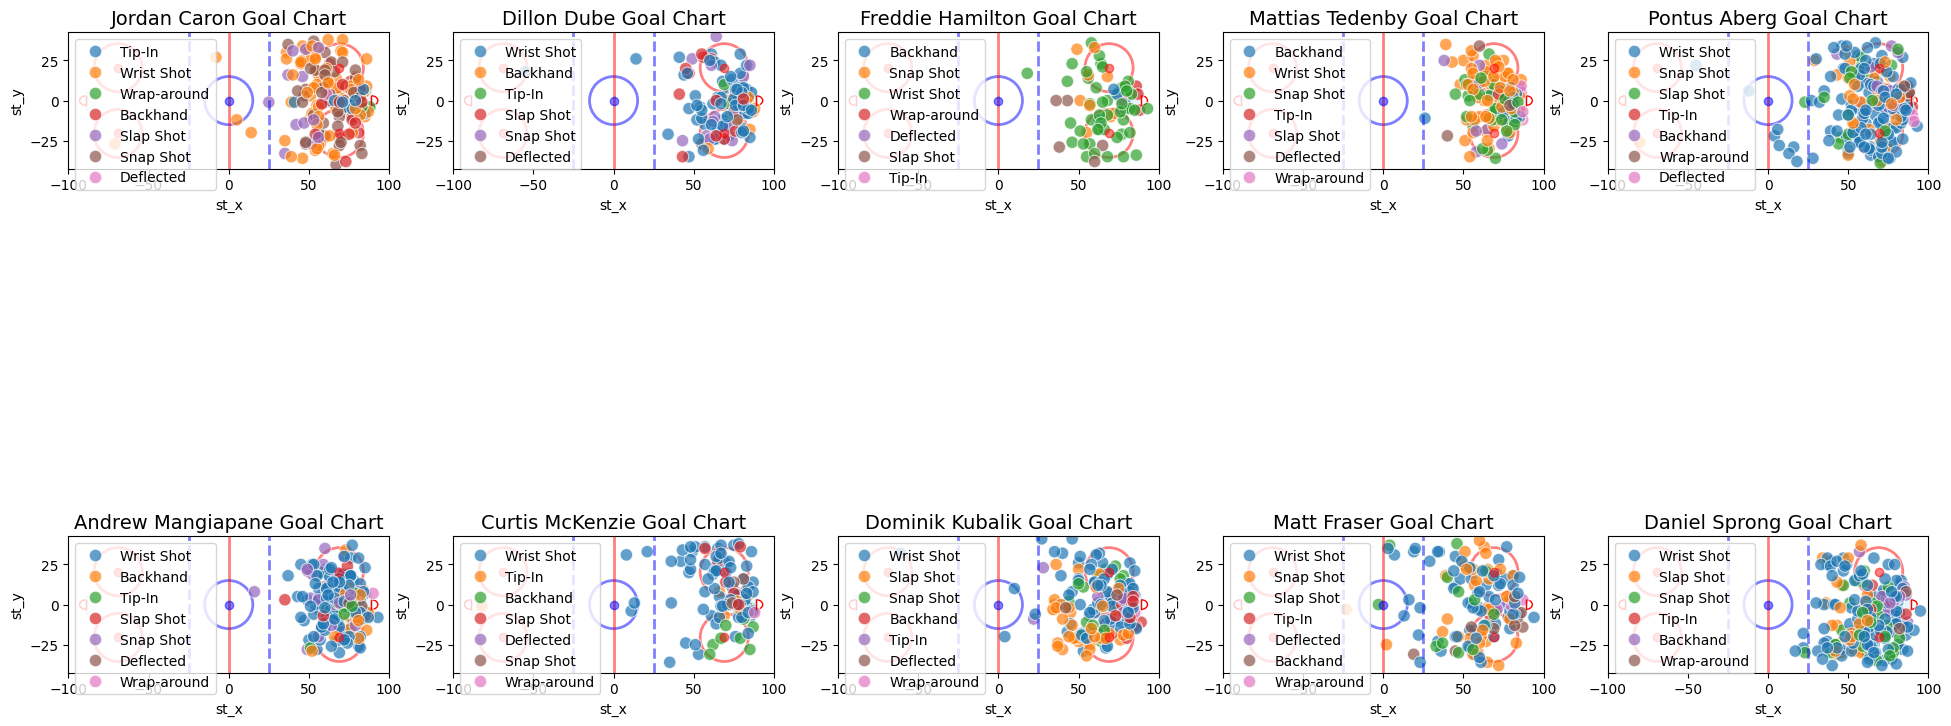

In [15]:
sampled_offplayer_ids = random_offensive_sample['player_id'].tolist()
filtered_offplays = merged_df[(merged_df['player_id'].isin(sampled_offplayer_ids)) & (merged_df['event'].isin(scoring_plays))]


fig, axes = plt.subplots(2, 5, figsize=(24,12))
axes = axes.flatten()

for i, (player_id) in enumerate(sampled_offplayer_ids):
    ax = axes[i]
    player_shots_goals = filtered_offplays[filtered_offplays['player_id'] == player_id]

    draw_rink(ax)

    sns.scatterplot(x=player_shots_goals['st_x'], y=player_shots_goals['st_y'], hue=player_shots_goals['secondaryType'], s=80, alpha=0.7, ax=ax)
    ax.legend(loc='upper left')
    
    player_name = filtered_offplays[filtered_offplays['player_id'] == player_id]['fullName'].iloc[1]
    ax.set_title(f"{player_name} Goal Chart", fontsize=14)
    

plt.show()

We also have to look at the goal heatmaps, as these are key to see how scoring locations change between league-average and all-star players. 

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color'

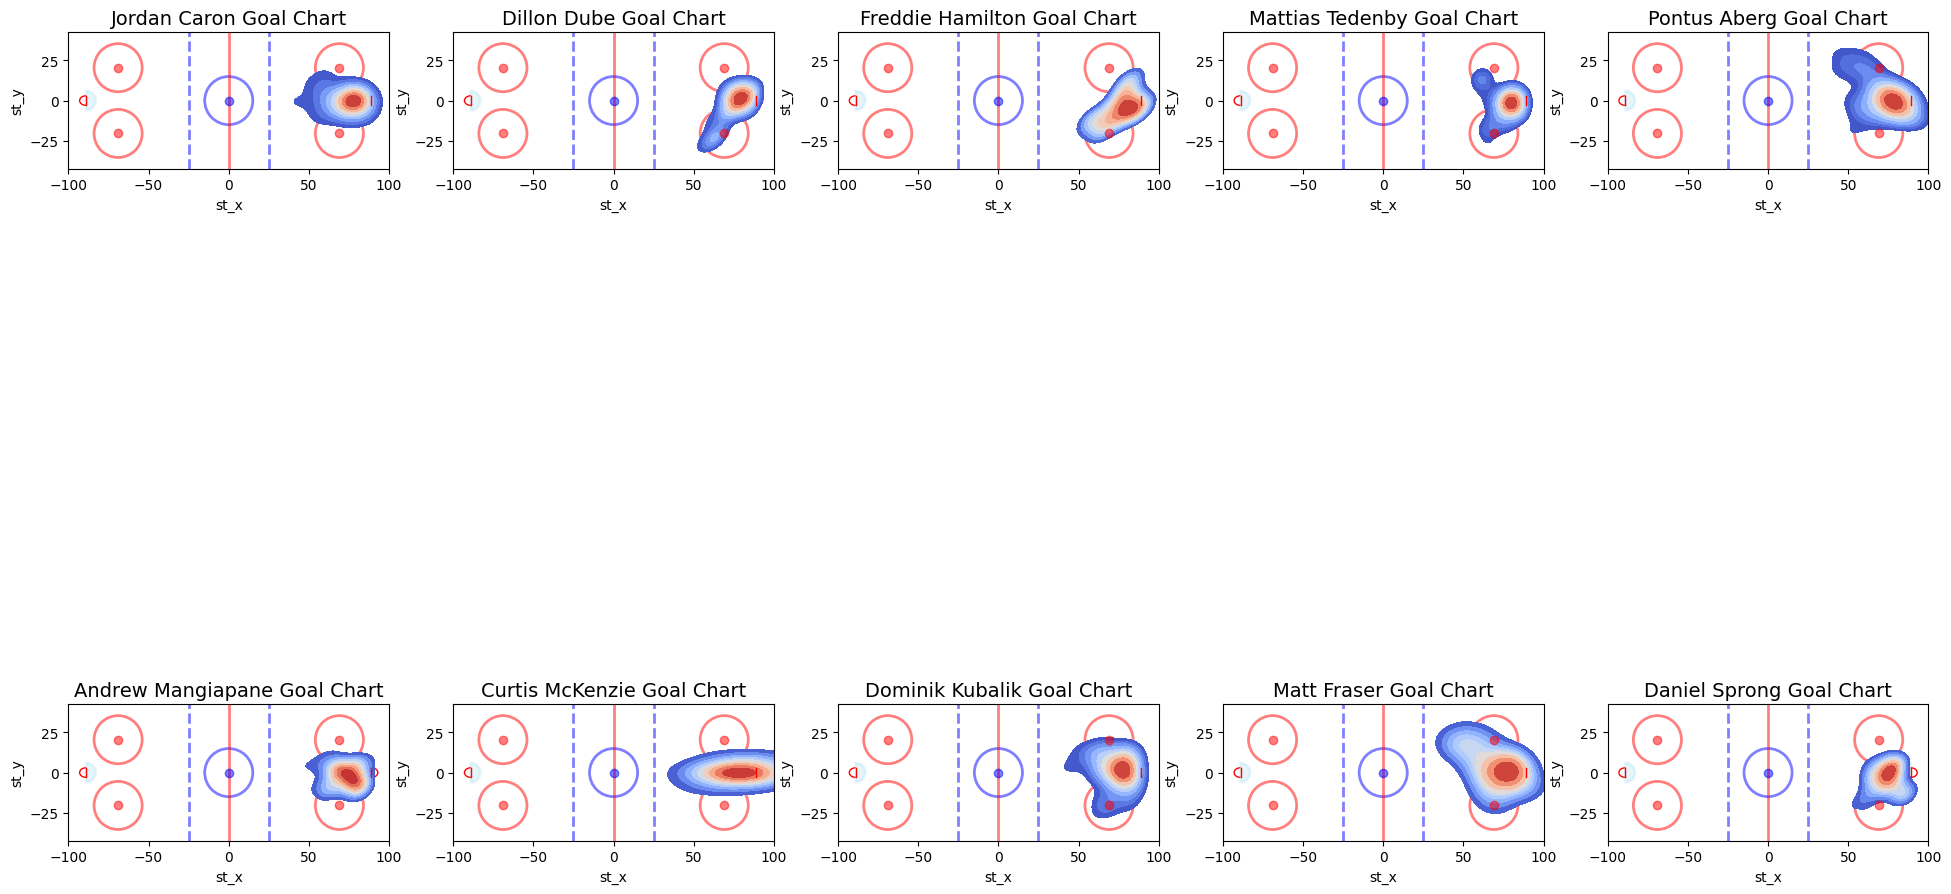

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(24,16))

axes = axes.flatten()

for i, (player_id) in enumerate(sampled_offplayer_ids):
    ax = axes[i]
    player_shots_goals = filtered_offplays[filtered_offplays['player_id'] == player_id]

    draw_rink(ax)

    sns.kdeplot(x='st_x', y='st_y', data=player_shots_goals, thresh=0.2, fill=True, cmap='coolwarm', ax=ax)
    player_name = filtered_offplays[filtered_offplays['player_id'] == player_id]['fullName'].iloc[1]
    ax.set_title(f"{player_name} Goal Chart", fontsize=14)

plt.show()
    
    

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color'

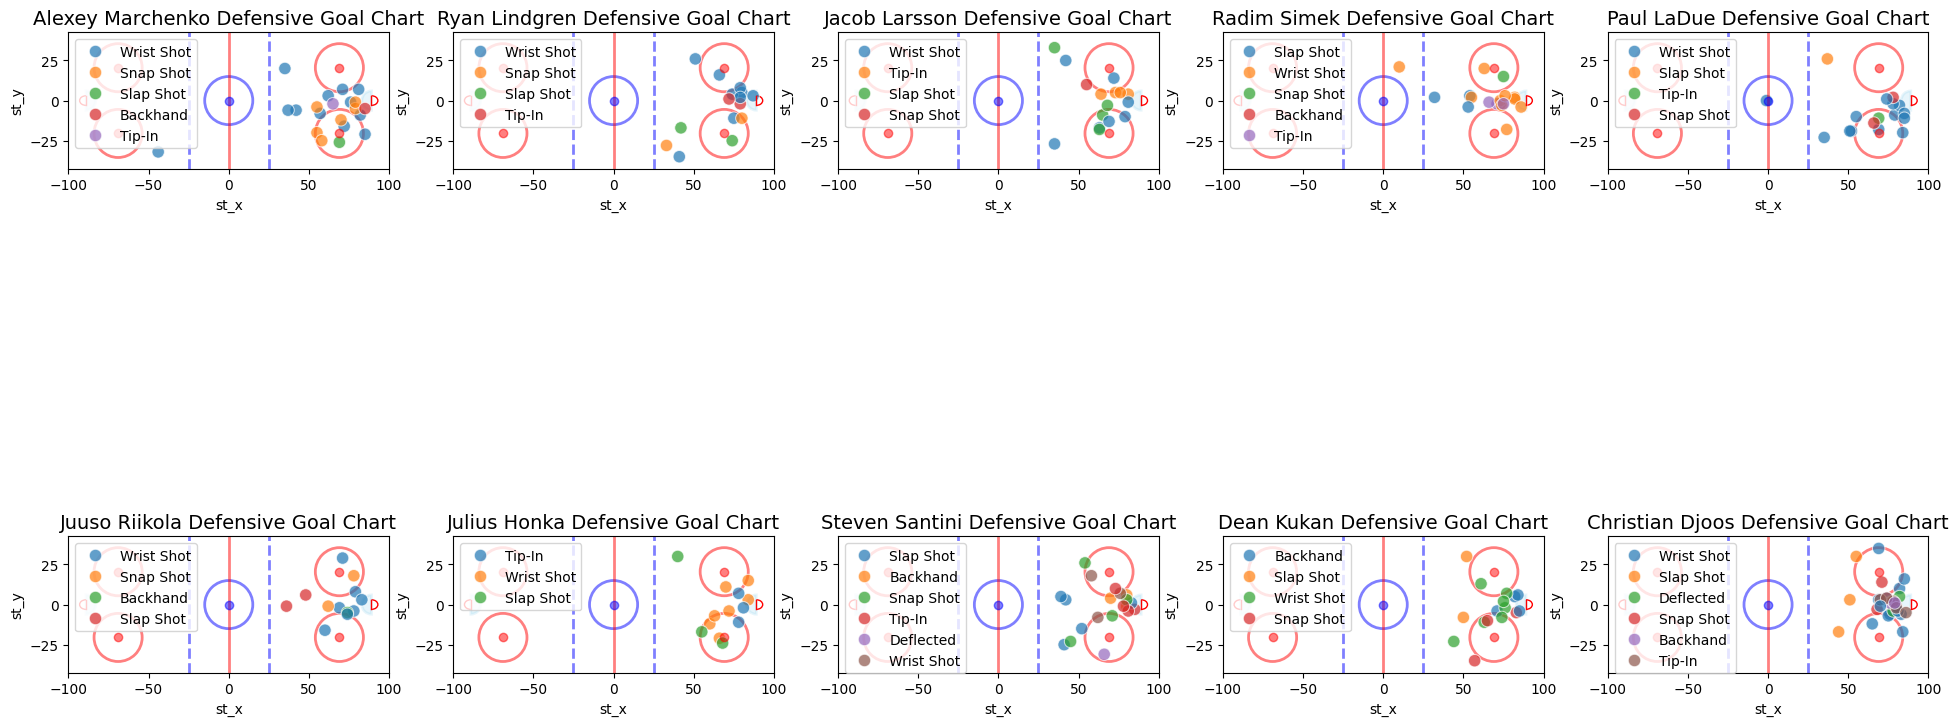

In [7]:
sampled_defplayer_ids = random_defensive_sample['player_id'].tolist()
filtered_defplays = merged_df[(merged_df['player_id'].isin(sampled_defplayer_ids)) & (merged_df['event'].isin(defensive_plays))]


fig, axes = plt.subplots(2, 5, figsize=(24,12))
axes = axes.flatten()

for i, (player_id) in enumerate(sampled_defplayer_ids):
    ax = axes[i]
    player_def_goals = filtered_defplays[filtered_defplays['player_id'] == player_id]

    draw_rink(ax)

    sns.scatterplot(x=player_def_goals['st_x'], y=player_def_goals['st_y'], hue=player_def_goals['secondaryType'], s=80, alpha=0.7, ax=ax)
    ax.legend(loc='upper left')
    
    player_name = filtered_defplays[filtered_defplays['player_id'] == player_id]['fullName'].iloc[1]
    ax.set_title(f"{player_name} Defensive Goal Chart", fontsize=14)
    

plt.show()



/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color'

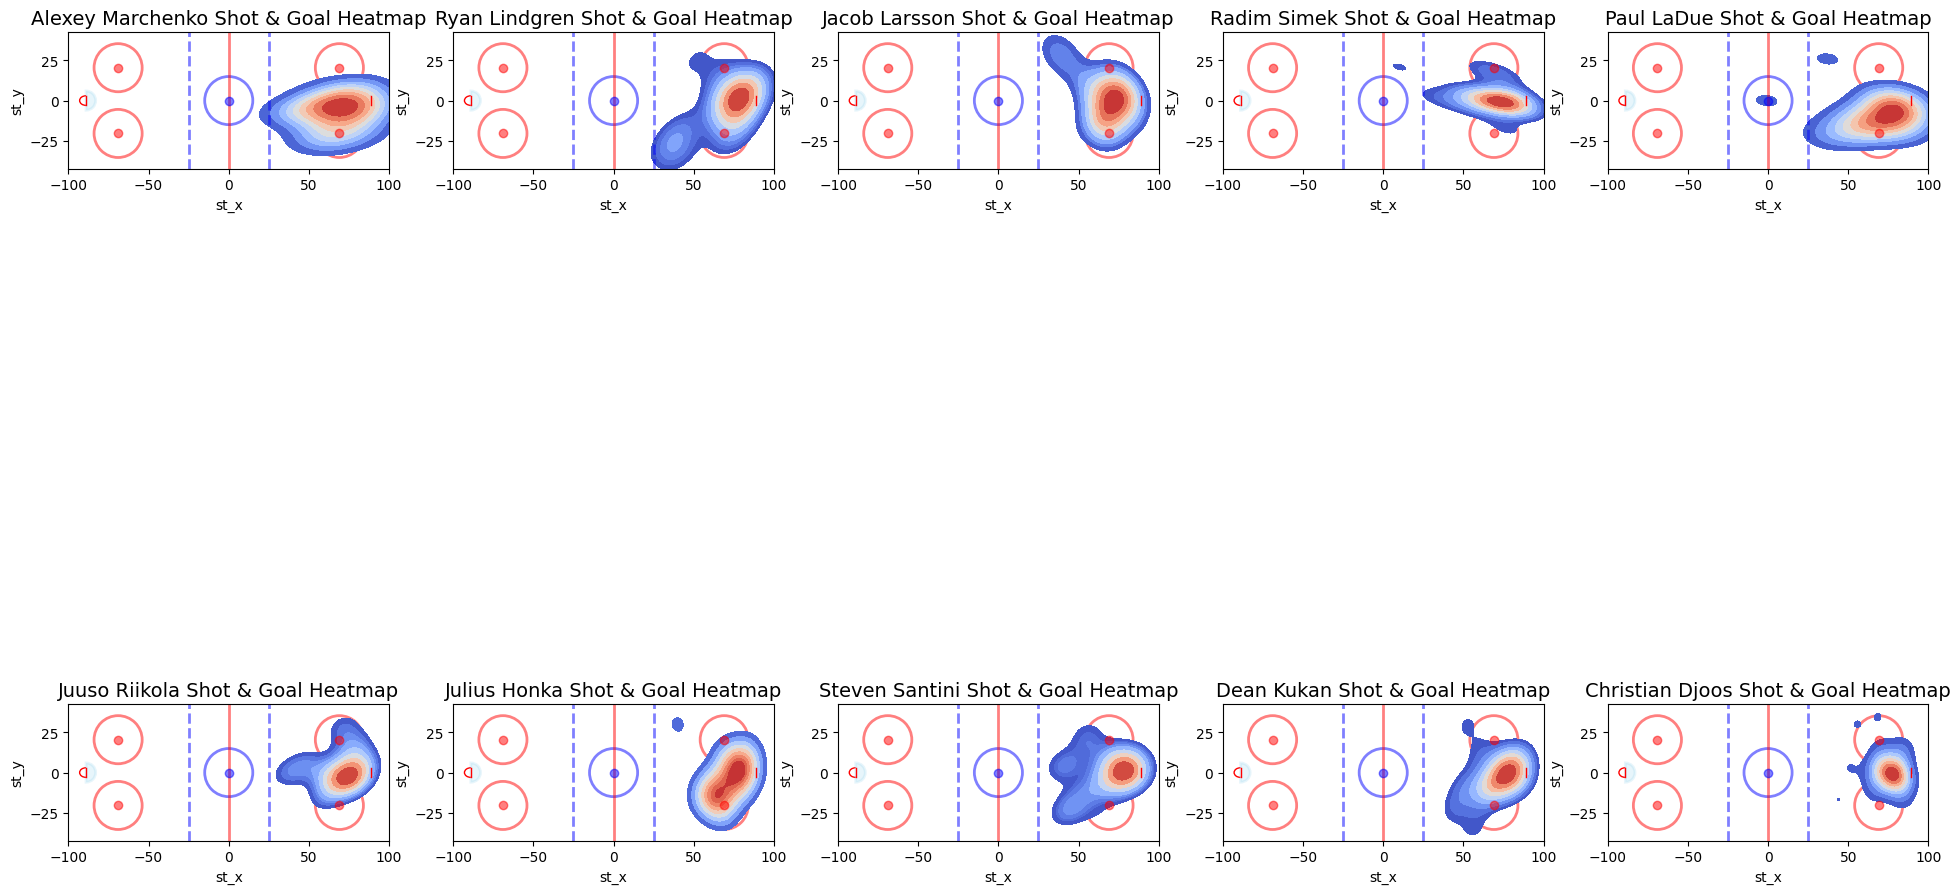

In [38]:
fig, axes = plt.subplots(2, 5, figsize=(24,16))

axes = axes.flatten()

for i, (player_id) in enumerate(sampled_defplayer_ids):
    ax = axes[i]
    player_def_goals = filtered_defplays[filtered_defplays['player_id'] == player_id]

    draw_rink(ax)

    sns.kdeplot(x='st_x', y='st_y', data=player_def_goals, thresh=0.2, fill=True, cmap='coolwarm', ax=ax)
    player_name = filtered_defplays[filtered_defplays['player_id'] == player_id]['fullName'].iloc[1]
    ax.set_title(f"{player_name} Shot & Goal Heatmap", fontsize=14)

plt.show()

Like we did in the all-star notebook, we should also look at goal scoring by period for league-average, this will show us the distribution of goals as the games goes on. We will filter the plays data by goal and group by period, to effectively get the total counts of goals per period for our sample. In this case, we will look solely at the offensive players as they are doing the primary goal scoring.

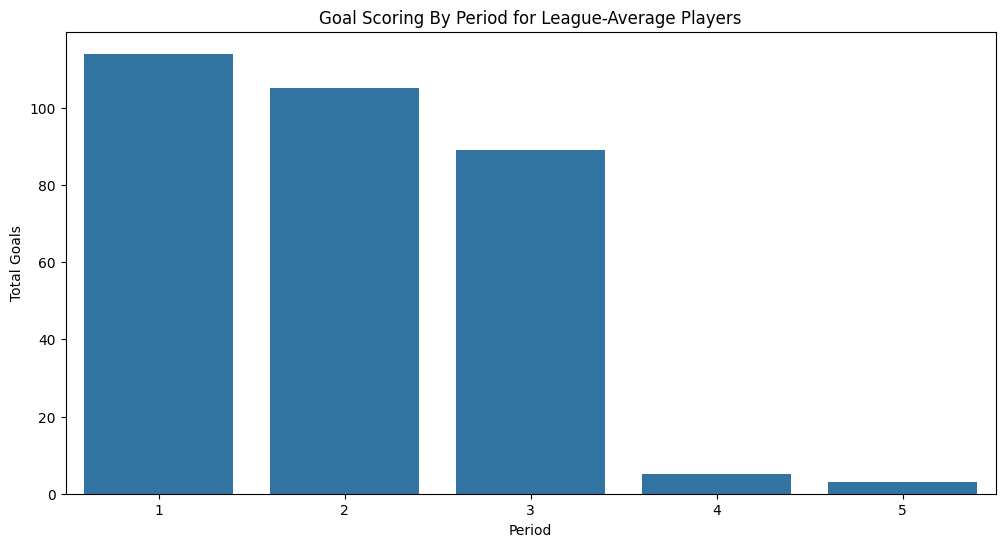

In [36]:
goal_scoring_by_period = filtered_offplays[filtered_offplays['event'] == 'Goal'].groupby('period').size().reset_index(name='Goal Count')
plt.figure(figsize=(12,6))
sns.barplot(x=goal_scoring_by_period['period'], y=goal_scoring_by_period['Goal Count'])
plt.title("Goal Scoring By Period for League-Average Players")
plt.xlabel("Period")
plt.ylabel("Total Goals")
plt.show()

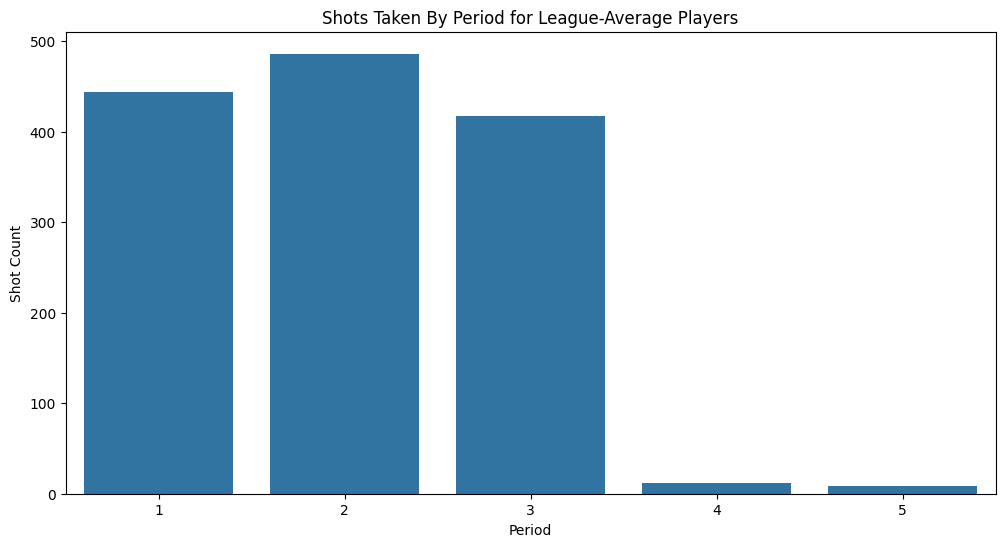

In [10]:
scoring_plays = ['Goal', 'Assist', 'Shot']
filtered_offplays = merged_df[(merged_df['player_id'].isin(sampled_offplayer_ids)) & (merged_df['event'].isin(scoring_plays))]
shots_taken_by_period = filtered_offplays[filtered_offplays['event'] == 'Shot'].groupby('period').size().reset_index(name='Shot Count')



plt.figure(figsize=(12,6))
sns.barplot(x=shots_taken_by_period['period'], y=shots_taken_by_period['Shot Count'])
plt.title("Shots Taken By Period for League-Average Players")
plt.xlabel("Period")
plt.ylabel("Shot Count")
plt.show()

Finally, like in the all-star notebook we will conclude with looking at the shot to goal ratio, this will give us a good comparison to the all-star players for how many goals they are getting, as well as the total amount of shots compared to the best players in the league. 

In [11]:
scoring_plays = ['Goal', 'Shot']
filtered_offplays = merged_df[(merged_df['player_id'].isin(sampled_offplayer_ids)) & (merged_df['event'].isin(scoring_plays))]
total_goals = (filtered_offplays['event'] == 'Goal').sum()
total_shots = (filtered_offplays['event'] == 'Shot').count()
total_shot_goal_ratio = total_goals / total_shots
display(total_shot_goal_ratio)
print("Total Shots:", total_shots)

np.float64(0.18775995246583482)

Total Shots: 1683


/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/2171558203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_offplays['Cluster'] = kmeans.labels_
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_57330/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue'

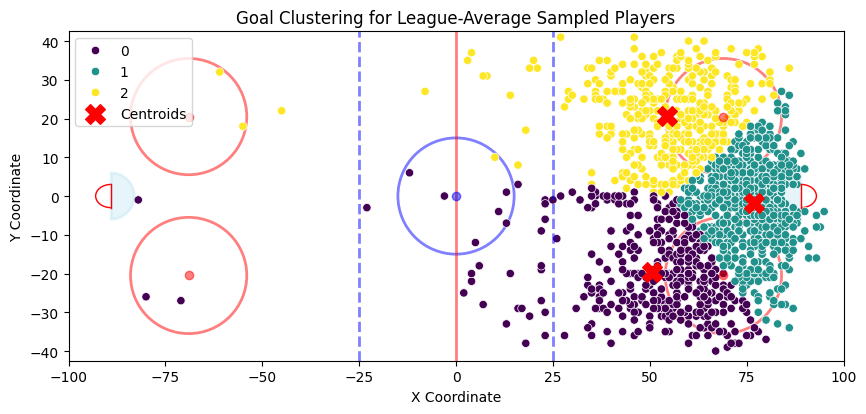

In [35]:
from sklearn.cluster import KMeans
num_clusters = 3 
scoring_plays = ['Goal', 'Shot']
filtered_offplays = merged_df[(merged_df['player_id'].isin(sampled_offplayer_ids)) & (merged_df['event'].isin(scoring_plays))]
shot_locations = filtered_offplays[['st_x', 'st_y']].dropna()
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(shot_locations)
filtered_offplays['Cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 6))
draw_rink(ax)
sns.scatterplot(x=filtered_offplays['st_x'], y=filtered_offplays['st_y'], hue=filtered_offplays['Cluster'], palette='viridis', ax=ax)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("Goal Clustering for League-Average Sampled Players")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend(loc='upper left')
plt.show()
